In [1]:
import pandas as pd
from quant import db
import sys
import talib
import matplotlib.pyplot as plt
%matplotlib inline

/Users/zhangzheng/pyenv/tensorflow/lib/python2.7/site-packages/flask_sqlalchemy/__init__.py:800: UserWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True to suppress this warning.
  warnings.warn('SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True to suppress this warning.')


In [2]:
codes = pd.read_csv("WIKI-datasets-codes.csv",header=None,names=['code','company_name'],index_col=False)
codes[:10]

,0,1
0,WIKI/FURX,"Furiex Pharmaceuticals, Inc. (FURX) Prices, Di..."
1,WIKI/FFBH,"First Federal Bancshares of Arkansas, Inc. (FF..."
2,WIKI/FDO,"Family Dollar Stores, Inc. (FDO) Prices, Divid..."
3,WIKI/QEP,"QEP Resources, Inc. (QEP) Prices, Dividends, S..."
4,WIKI/CHTP,"Chelsea Therapeutics International, Ltd. (CHTP..."
5,WIKI/VLCCF,"Knightsbridge Tankers Limited (VLCCF) Prices, ..."
6,WIKI/RLOC,"ReachLocal Inc. (RLOC) Prices, Dividends, Spli..."
7,WIKI/HSH,"Hillshire Brands Company (The) (HSH) Prices, D..."
8,WIKI/ELRC,"Electro Rent Corp. (ELRC) Prices, Dividends, S..."
9,WIKI/XOXO,"XO Group (XOXO) Prices, Dividends, Splits and ..."


In [23]:
dataA=pd.read_sql(sql="select * from prices_A where code='A'",con=db.session.connection())

In [28]:
dataA[:10]

,Date,Code,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1999-11-18,A,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,43.471810,47.771219,38.216975,42.038673,44739900.0
1,1999-11-19,A,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,41.025923,41.083249,38.035445,38.580037,10897100.0
2,1999-11-22,A,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,39.468581,42.038673,38.274301,42.038673,4705200.0
3,1999-11-23,A,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,40.605536,41.685166,38.455832,38.455832,4274400.0
4,1999-11-24,A,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,38.341181,40.070499,38.216975,39.229725,3464400.0
5,1999-11-26,A,40.88,41.50,40.75,41.19,1237100.0,0.0,1.0,39.057749,39.650112,38.933544,39.353930,1237100.0
6,1999-11-29,A,41.00,42.44,40.56,42.13,2914700.0,0.0,1.0,39.172400,40.548211,38.752013,40.252029,2914700.0
7,1999-11-30,A,42.00,42.94,40.94,42.19,3083000.0,0.0,1.0,40.127824,41.025923,39.115074,40.309355,3083000.0
8,1999-12-01,A,42.19,43.44,41.88,42.94,2115400.0,0.0,1.0,40.309355,41.503635,40.013173,41.025923,2115400.0
9,1999-12-02,A,43.75,45.00,43.19,44.13,2195900.0,0.0,1.0,41.799817,42.994097,41.264779,42.162878,2195900.0


In [25]:
macd,macdsignal,macdhist=talib.MACD(dataA['Close'].values)

In [45]:
t1=pd.DataFrame({"Close":dataA.Close.values,"macd":macd,"macdsignal":macdsignal,'macdhist':macdhist},index=dataA.Date)

t1[['macd','macdsignal']][-30:].plot()

Object `plot` not found.


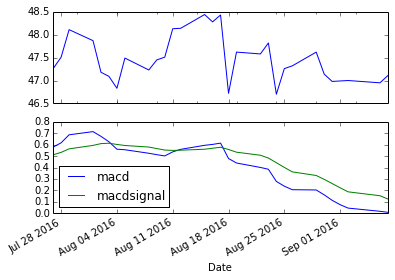

In [50]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
t1['Close'][-30:].plot(ax=ax1,sharex=True)
t1[['macd','macdsignal']][-30:].plot(ax=ax2,sharex=True)

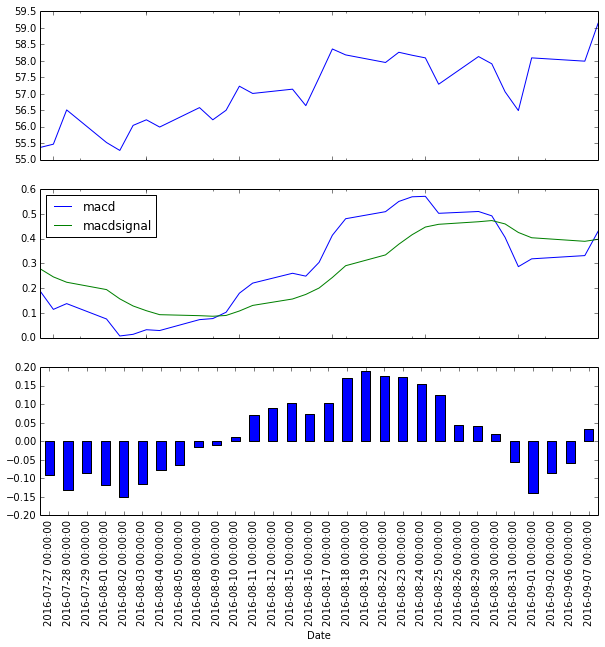

In [93]:
#the whole
code='NFG'
prefixL = code[0].upper()
data=pd.read_sql(sql="select * from prices_%s where code='%s'" % (prefixL,code), con=db.session.connection())
macd,macdsignal,macdhist=talib.MACD(data['Close'].values)
t1=pd.DataFrame({"Close":data.Close.values,"macd":macd,"macdsignal":macdsignal,'macdhist':macdhist},index=data.Date)
#plot
num=30
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
t1['Close'][-num:].plot(ax=ax1,sharex=True)
t1[['macd','macdsignal']][-num:].plot(ax=ax2,sharex=True)
t1['macdhist'][-num:].plot(ax=ax3,sharex=True,kind='bar')

In [82]:
t1['macd'][-1]

Timestamp('2016-09-07 00:00:00')

In [87]:
#金叉判断  macd、macdsignal均为正，macd向上突破macdsignal，买入信号
#选择上穿点发生在最近三天的股票
simple_codes = codes['code'].str.replace("WIKI/","").values
for code in simple_codes[:100]:
    print('macd start to process %s' % code)
    prefixL = code[0].upper()
    data=pd.read_sql(sql="select * from prices_%s where code='%s'" % (prefixL,code), con=db.session.connection())
    macd,macdsignal,macdhist=talib.MACD(data['Close'].values)
    t1=pd.DataFrame({"Close":data.Close.values,"macd":macd,"macdsignal":macdsignal,'macdhist':macdhist},index=data.Date)
    #判断最近一天是否上穿点
    if t1['macd'][-1]>0 and t1['macdsignal'][-1]>0 \
        and t1['macd'][-1]>t1['macdsignal'][-1] and t1['macd'][-2]<t1['macdsignal'][-2]:       
        print('code %s macd出现金叉' % code)
        
    else:
        print("code %s macd 没有出现金叉" % code)

macd start to process FURX
code FURX macd 没有出现金叉
macd start to process FFBH
code FFBH macd 没有出现金叉
macd start to process FDO
code FDO macd 没有出现金叉
macd start to process QEP
code QEP macd 没有出现金叉
macd start to process CHTP
code CHTP macd 没有出现金叉
macd start to process VLCCF
code VLCCF macd 没有出现金叉
macd start to process RLOC
code RLOC macd 没有出现金叉
macd start to process HSH
code HSH macd 没有出现金叉
macd start to process ELRC
code ELRC macd 没有出现金叉
macd start to process XOXO
code XOXO macd 没有出现金叉
macd start to process ATRO
code ATRO macd 没有出现金叉
macd start to process ETFC
code ETFC macd 没有出现金叉
macd start to process RLJ
code RLJ macd 没有出现金叉
macd start to process PKI
code PKI macd 没有出现金叉
macd start to process TROW
code TROW macd 没有出现金叉
macd start to process WY
code WY macd 没有出现金叉
macd start to process NICK
code NICK macd 没有出现金叉
macd start to process NLNK
code NLNK macd 没有出现金叉
macd start to process BSRR
code BSRR macd 没有出现金叉
macd start to process USCR
code USCR macd 没有出现金叉
macd start to process NNBR
code 

KeyboardInterrupt: 

In [76]:
print("haha")

haha


In [90]:
codes[codes.code=='WIKI/NFG']

,code,company_name
35,WIKI/NFG,"National Fuel Gas Co. (NJ) (NFG) Prices, Divid..."
